#  Práctica 3 - Reducción de Dimensionalidad

Elaborado por: Yurandir Santa María Santana Sandoval - Carné no. 18001546.

## Librerías

In [28]:
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
%matplotlib inline 

from sklearn.model_selection import train_test_split
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

## Código

### Cargando los Datos (MNIST)

In [48]:
BBDD = pd.read_csv('fashion-mnist_train.csv')

In [49]:
X, y = BBDD.iloc[:, 1:].to_numpy(), BBDD.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

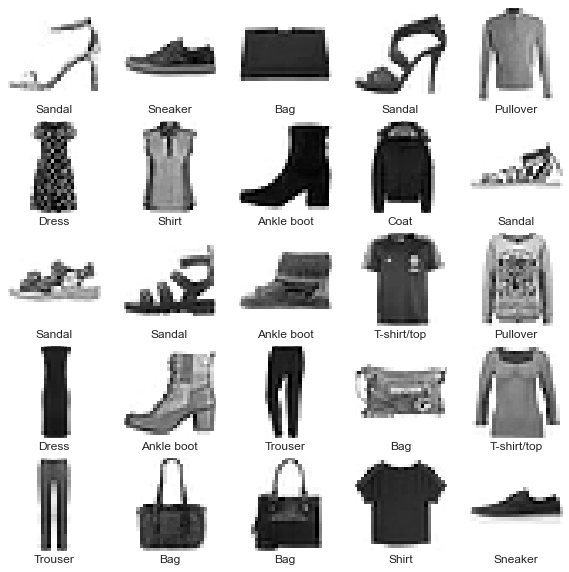

In [51]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

### PCA

In [52]:
pca = PCA(n_components = 0.95)

X_reduced = pca.fit_transform(X_train)

In [53]:
pca.explained_variance_ratio_[:10]

array([0.2898411 , 0.17740469, 0.06014269, 0.04988386, 0.038573  , 0.03455608, 0.02352776, 0.0190694 , 0.01344913, 0.0130614 ])

In [54]:
pca = PCA(n_components = 179)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [57]:
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):

    X_normalized = MinMaxScaler().fit_transform(X)

    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("prism")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

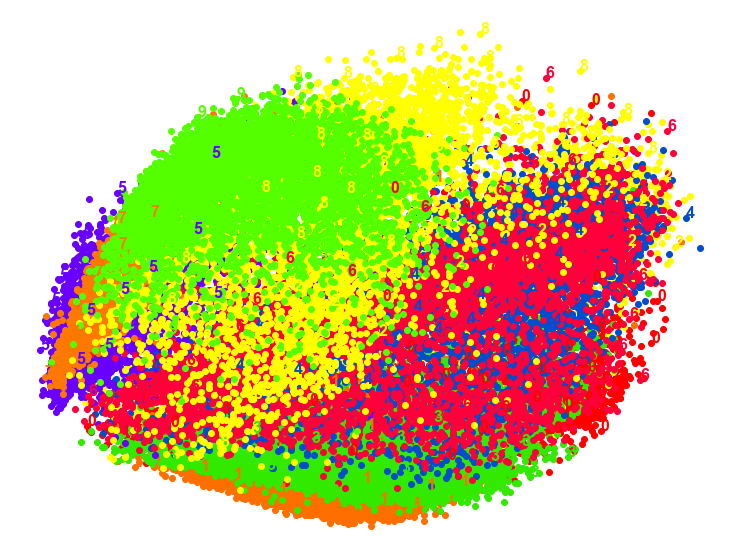

In [58]:
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train)
plot_digits(X_pca_reduced, y_train)
plt.show()

### TSNE

C:\Users\yuran\anaconda3\envs\UniversidadGalileo2022\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yuran\anaconda3\envs\UniversidadGalileo2022\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


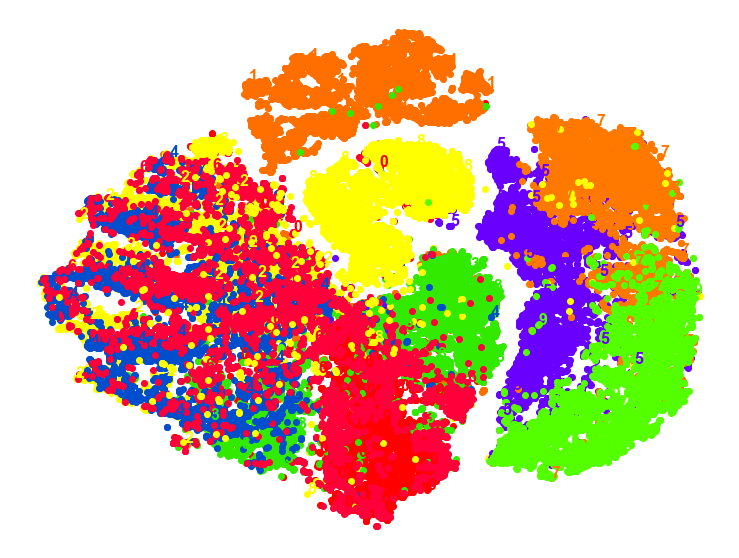

In [60]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
X_pca_tsne_reduced = pca_tsne.fit_transform(X_train)
plot_digits(X_pca_tsne_reduced, y_train)
plt.show()

### Conlusiones

TSNE provee una mejor distinción de clusters que el método de PCA, pero aún así no son del todo diferenciados, por lo que los cluster no se podrían etiquetar y categorizar.